### Predicting probabilities of xyz and seasonal Flu Vaccines using LogisticRegression

Our goal is to predict how likely individuals are to receive their xyz and seasonal flu
vaccines. e.

IMPORTING REQUIRED LIBRARIES

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### LOADING DATASETS

In [57]:
df_train = pd.read_csv("training_set_features.csv")
df_test = pd.read_csv("test_set_features.csv")
df_labels = pd.read_csv("training_set_labels.csv")

In [58]:
df_train

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [60]:
df_test

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [61]:
 df_labels

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [62]:
df_train = df_train.merge(df_labels, on = 'respondent_id', how='right')
df_train

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


### Checking Null Values

In [63]:
df_train.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [64]:
df_test.isnull().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

### Dropping Null Values

In [65]:
for column in df_train.columns:
    df_train[column].fillna(df_train[column].mode()[0], inplace=True)

for column in df_test.columns:
    df_test[column].fillna(df_test[column].mode()[0], inplace=True)

In [66]:
df_train.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [67]:
df_test.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [68]:
df_train.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,xyz_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,3.852810,2.337589,2.352380,4.025536,2.705321,2.095630,0.887558,0.529599,0.212454,0.465608
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,1.000195,1.276825,1.353339,1.077131,1.375216,1.328782,0.749980,0.925264,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


### Preprocessing

In [69]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


df_train.age_group = le.fit_transform(df_train.age_group)
df_train.education = le.fit_transform(df_train.education)
df_train.race = le.fit_transform(df_train.race)
df_train.sex = le.fit_transform(df_train.sex)
df_train.income_poverty = le.fit_transform(df_train.income_poverty)
df_train.marital_status  = le.fit_transform(df_train.marital_status)
df_train.rent_or_own = le.fit_transform(df_train.rent_or_own)
df_train.employment_status = le.fit_transform(df_train.employment_status)
df_train.hhs_geo_region  = le.fit_transform(df_train.hhs_geo_region )
df_train.census_msa  = le.fit_transform(df_train.census_msa )
df_train.employment_industry  = le.fit_transform(df_train.employment_industry)
df_train.employment_occupation = le.fit_transform(df_train.employment_occupation)

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [71]:
df_test.age_group = le.fit_transform(df_test.age_group)
df_test.education = le.fit_transform(df_test.education)
df_test.race = le.fit_transform(df_test.race)
df_test.sex = le.fit_transform(df_test.sex)
df_test.income_poverty = le.fit_transform(df_test.income_poverty)
df_test.marital_status  = le.fit_transform(df_test.marital_status)
df_test.rent_or_own = le.fit_transform(df_test.rent_or_own)
df_test.employment_status = le.fit_transform(df_test.employment_status)
df_test.hhs_geo_region  = le.fit_transform(df_test.hhs_geo_region )
df_test.census_msa  = le.fit_transform(df_test.census_msa )
df_test.employment_industry  = le.fit_transform(df_test.employment_industry)
df_test.employment_occupation = le.fit_transform(df_test.employment_occupation)

In [72]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26708 non-null  float64
 2   xyz_knowledge                26708 non-null  float64
 3   behavioral_antiviral_meds    26708 non-null  float64
 4   behavioral_avoidance         26708 non-null  float64
 5   behavioral_face_mask         26708 non-null  float64
 6   behavioral_wash_hands        26708 non-null  float64
 7   behavioral_large_gatherings  26708 non-null  float64
 8   behavioral_outside_home      26708 non-null  float64
 9   behavioral_touch_face        26708 non-null  float64
 10  doctor_recc_xyz              26708 non-null  float64
 11  doctor_recc_seasonal         26708 non-null  float64
 12  chronic_med_condition        26708 non-null  float64
 13  child_under_6_mo

### Distplot of Target Variables

<Axes: xlabel='xyz_vaccine', ylabel='Density'>

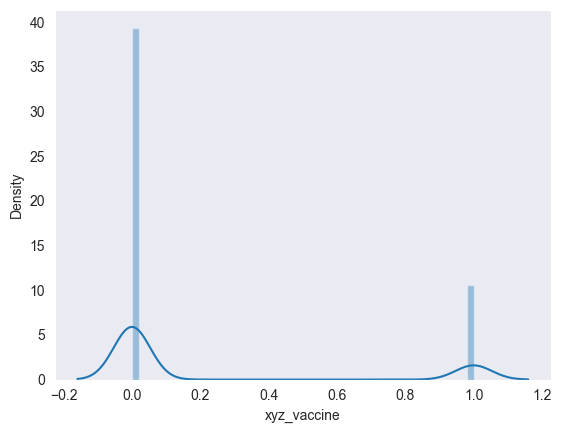

In [73]:
sns.distplot(df_train['xyz_vaccine'])

<Axes: xlabel='seasonal_vaccine', ylabel='Density'>

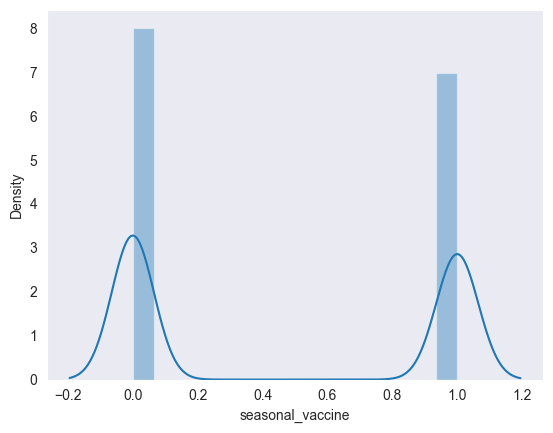

In [74]:
sns.distplot(df_train['seasonal_vaccine'])

### Checking the Correlation

In [75]:
df_train.corr()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
respondent_id,1.000000,0.017896,0.003473,-0.008458,0.008912,-0.006654,0.011212,0.004455,0.009181,0.007606,...,-0.007372,-0.005176,0.011586,0.004446,0.000172,-0.003650,0.009141,0.005814,-0.003280,-0.004652
xyz_concern,0.017896,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,...,0.000714,0.055753,-0.008849,0.004215,-0.016079,0.049441,-0.039339,0.023224,0.121574,0.154488
xyz_knowledge,0.003473,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,...,-0.108313,-0.118124,-0.017311,-0.060630,0.023866,0.053378,0.019153,-0.177004,0.117771,0.119779
behavioral_antiviral_meds,-0.008458,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,...,0.056575,0.000885,0.009144,0.012176,0.044829,0.083090,0.015983,0.012850,0.040226,0.006013
behavioral_avoidance,0.008912,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,...,-0.028909,0.022550,-0.000807,-0.032665,0.017995,0.038977,-0.007833,-0.000372,0.046837,0.076130
behavioral_face_mask,-0.006654,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,...,0.043492,0.027248,0.009504,-0.003851,0.014191,0.004794,-0.048724,0.009112,0.070413,0.050020
behavioral_wash_hands,0.011212,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,...,-0.017509,0.001039,-0.007625,-0.016584,0.009367,0.047451,-0.011737,-0.021946,0.074570,0.112254
behavioral_large_gatherings,0.004455,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,...,0.047477,0.132775,0.011261,0.037169,-0.030994,-0.009126,-0.078783,0.118142,0.018089,0.063722
behavioral_outside_home,0.009181,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,...,0.063544,0.138451,0.014294,0.028633,-0.026542,-0.008937,-0.076401,0.124808,0.022080,0.053287
behavioral_touch_face,0.007606,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,...,-0.017302,0.029249,-0.006272,0.004741,-0.001233,0.023739,-0.022677,-0.010249,0.070855,0.119925


<Axes: >

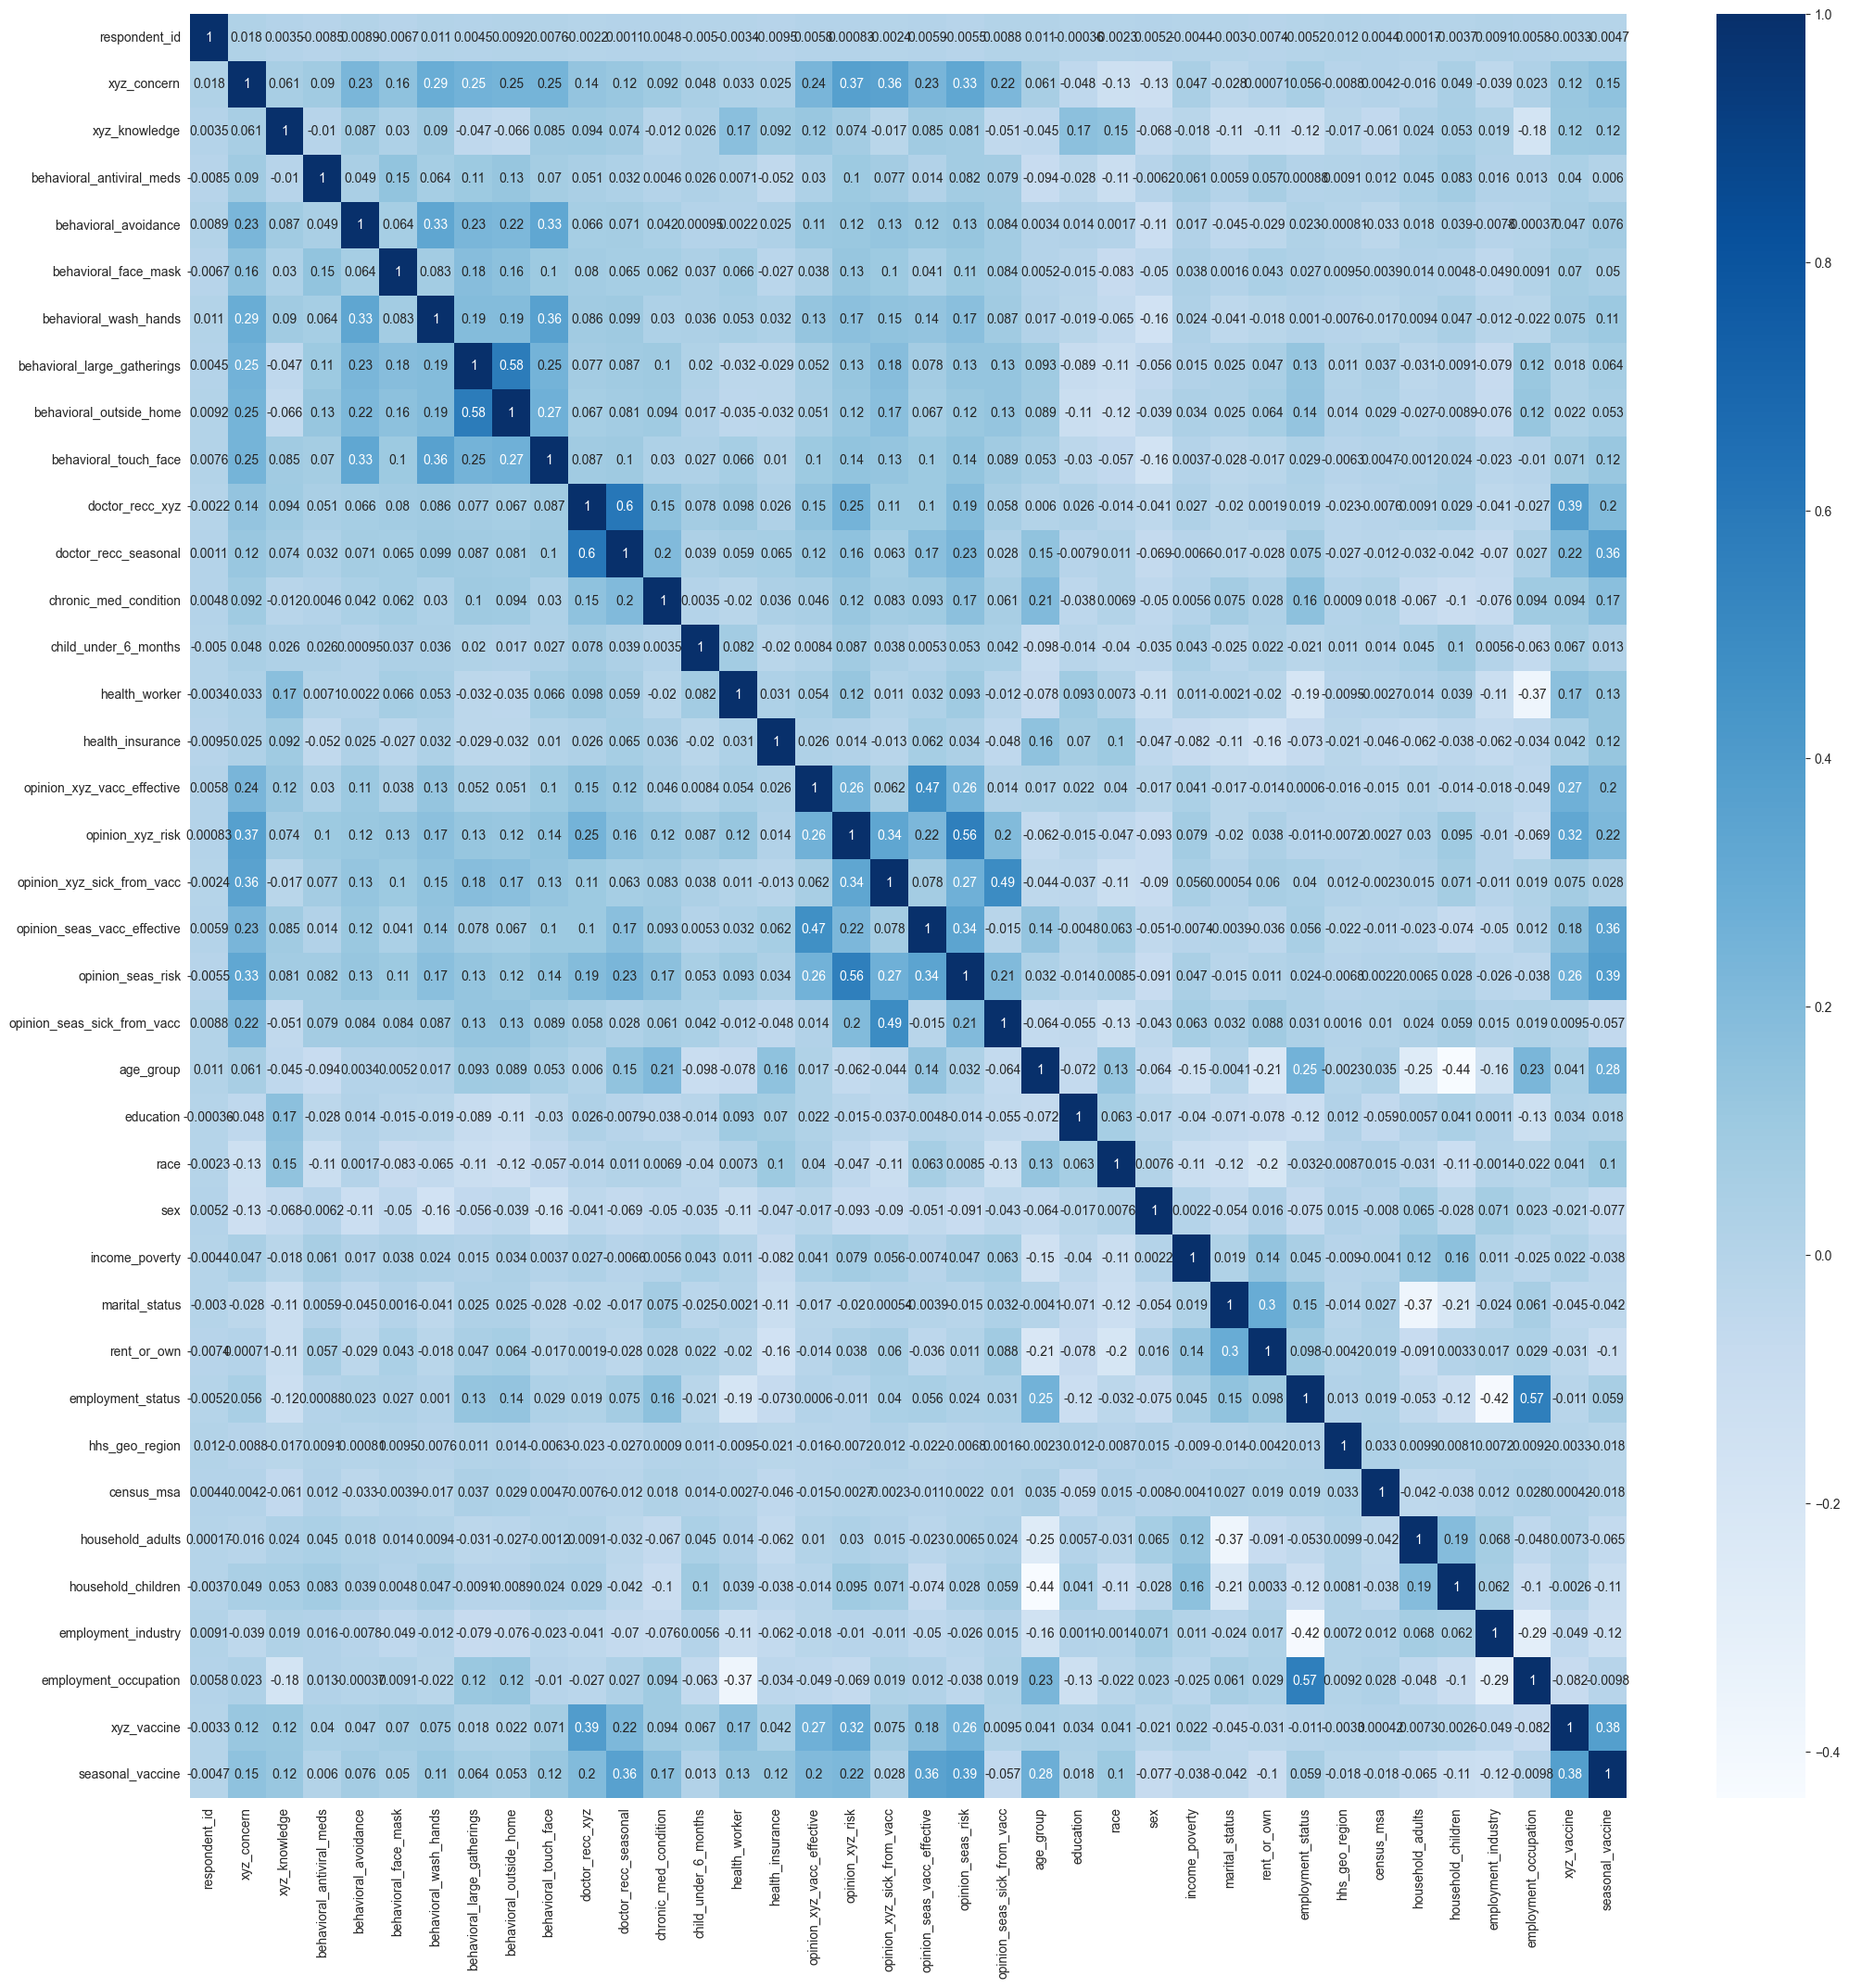

In [76]:
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),cmap='Blues',annot=True)

In [77]:
from collections import Counter

print(Counter(df_train.xyz_vaccine))

Counter({0: 21033, 1: 5674})


In [78]:
from collections import Counter

print(Counter(df_train.seasonal_vaccine))

Counter({0: 14272, 1: 12435})


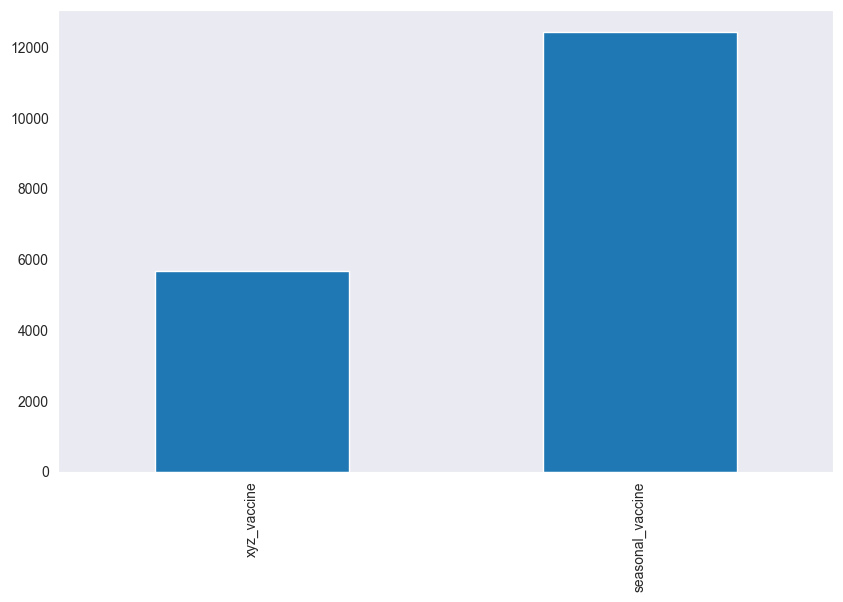

In [79]:
target = ['xyz_vaccine','seasonal_vaccine']
y_data = df_train[target]

plt.figure(figsize=(10,6))
y_data.sum(axis=0).plot.bar()
plt.show()

In [80]:
y = df_train[target]
X = df_train.drop(['respondent_id','xyz_vaccine','seasonal_vaccine'], axis = 1)
X_test = df_test.drop(['respondent_id'],axis = 1)

y.shape, X.shape, X_test.shape

((26707, 2), (26707, 35), (26708, 35))

### Split data into separate training and validation set

In [81]:
from sklearn.model_selection import train_test_split
 
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.10, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((24036, 35), (2671, 35), (24036, 2), (2671, 2))

### Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val =scaler.transform(X_val)
X_test = scaler.transform(X_test)

<Axes: xlabel='xyz_vaccine', ylabel='Density'>

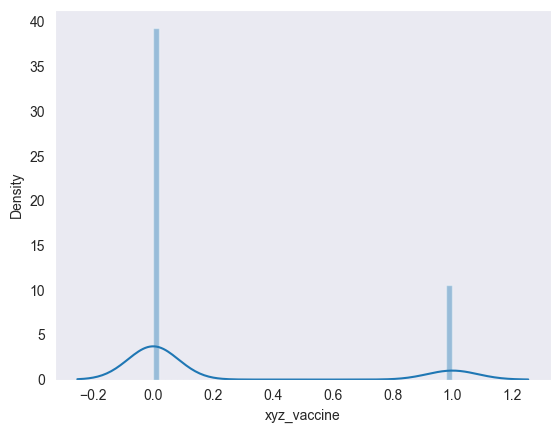

In [83]:
sns.distplot(y_val.xyz_vaccine)

<Axes: xlabel='seasonal_vaccine', ylabel='Density'>

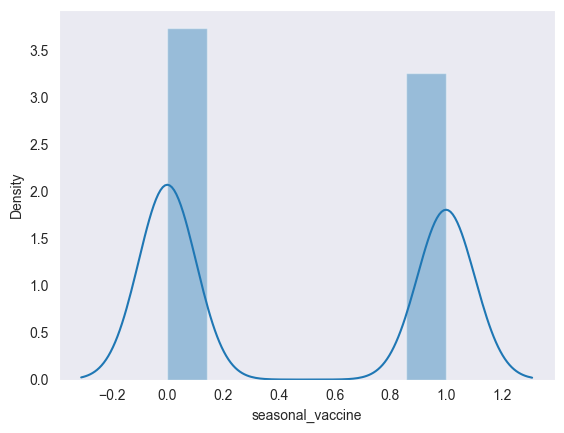

In [84]:
sns.distplot(y_val.seasonal_vaccine)

### LOGISTIC REGRESSION

In [85]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

model = MultiOutputClassifier(LogisticRegression())
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.6646280579131303


In [86]:
y_pred = model.predict(X_val)
print(model.score(X_val,y_val))
y_pred

0.6716585548483714


array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 1],
       [0, 1]], dtype=int64)

In [87]:
y_val.value_counts()

xyz_vaccine  seasonal_vaccine
0            0                   1329
             1                    774
1            1                    470
             0                     98
Name: count, dtype: int64

In [88]:
from sklearn import metrics 

metrics = metrics.classification_report(y_val,y_pred)
print(metrics)

              precision    recall  f1-score   support

           0       0.69      0.41      0.52       568
           1       0.78      0.73      0.76      1244

   micro avg       0.76      0.63      0.69      1812
   macro avg       0.73      0.57      0.64      1812
weighted avg       0.75      0.63      0.68      1812
 samples avg       0.34      0.32      0.32      1812



In [89]:
from sklearn.metrics import roc_auc_score

print("The AUC score of Logistic Regression: ",roc_auc_score(y_val, y_pred))

The AUC score of Logistic Regression:  0.7288738639559577


In [90]:
df = pd.DataFrame({'Actual_xyz':y_val.xyz_vaccine,'Actual_seasonal':y_val.seasonal_vaccine,'xyz':y_pred[:,0],'seasonal':y_pred[:,0]})
df

,Actual_xyz,Actual_seasonal,xyz,seasonal
24326,0,0,0,0
18384,1,1,1,1
2337,0,0,0,0
9725,1,1,1,1
4606,1,1,1,1
...,...,...,...,...
17371,1,1,0,0
534,1,1,0,0
22283,0,0,0,0
263,1,1,0,0


In [91]:
 from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [92]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.52       568
           1       0.78      0.73      0.76      1244

   micro avg       0.76      0.63      0.69      1812
   macro avg       0.73      0.57      0.64      1812
weighted avg       0.75      0.63      0.68      1812
 samples avg       0.34      0.32      0.32      1812



In [93]:
print(accuracy_score(y_val,y_pred)) 

0.6716585548483714


### Confusion Matrix

In [94]:
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrix = multilabel_confusion_matrix(y_val,y_pred)

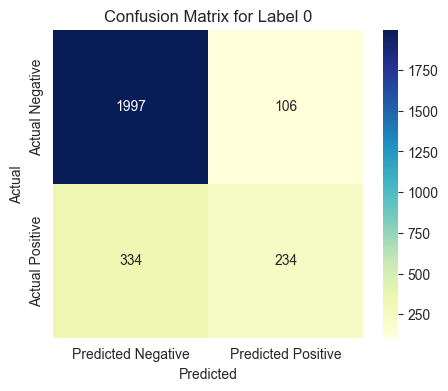

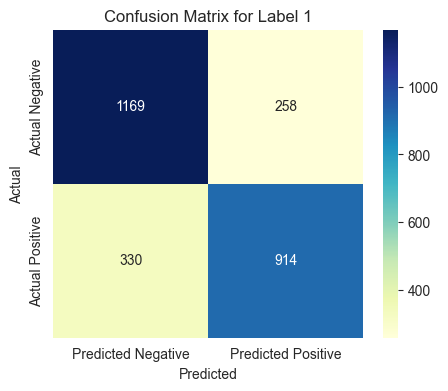

In [95]:
for i, cm in enumerate(confusion_matrix):
    cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Negative', 'Predicted Positive'], 
                             index=['Actual Negative', 'Actual Positive'])
    plt.figure(figsize=(5, 4))
    plt.title(f'Confusion Matrix for Label {i}')
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [96]:
predict = model.predict(X_test)
predict

array([[0, 0],
       [0, 0],
       [0, 1],
       ...,
       [0, 0],
       [0, 0],
       [1, 1]], dtype=int64)

### Predict Probabilities

In [97]:
proba = model.predict_proba(X_test)
proba = np.asarray(proba)
proba 

array([[[0.90987784, 0.09012216],
        [0.95161804, 0.04838196],
        [0.56439181, 0.43560819],
        ...,
        [0.86321976, 0.13678024],
        [0.94441099, 0.05558901],
        [0.44668015, 0.55331985]],

       [[0.72288082, 0.27711918],
        [0.95784556, 0.04215444],
        [0.31404497, 0.68595503],
        ...,
        [0.78562313, 0.21437687],
        [0.55207776, 0.44792224],
        [0.42206457, 0.57793543]]])

In [98]:
 proba[0,:]

array([[0.90987784, 0.09012216],
       [0.95161804, 0.04838196],
       [0.56439181, 0.43560819],
       ...,
       [0.86321976, 0.13678024],
       [0.94441099, 0.05558901],
       [0.44668015, 0.55331985]])

In [99]:
proba[0,:][:,1]

array([0.09012216, 0.04838196, 0.43560819, ..., 0.13678024, 0.05558901,
       0.55331985])

In [100]:
proba[1,:][:,1]

array([0.27711918, 0.04215444, 0.68595503, ..., 0.21437687, 0.44792224,
       0.57793543])

In [101]:
df_vaccine = pd.DataFrame(proba[0,:][:,1], proba[1,:][:,1])
df_vaccine.reset_index(inplace = True)
df_vaccine.columns = ["xyz_vaccine","seasonal_vaccine"]
df_vaccine

,xyz_vaccine,seasonal_vaccine
0,0.277119,0.090122
1,0.042154,0.048382
2,0.685955,0.435608
3,0.875697,0.472148
4,0.502543,0.232010
...,...,...
26703,0.545947,0.338139
26704,0.208028,0.083289
26705,0.214377,0.136780
26706,0.447922,0.055589


In [102]:
for_sub = pd.DataFrame({'respondent_id':df_test.respondent_id,'xyz_vaccine':df_vaccine.xyz_vaccine,'seasonal_vaccine':df_vaccine.seasonal_vaccine})
for_sub

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.277119,0.090122
1,26708,0.042154,0.048382
2,26709,0.685955,0.435608
3,26710,0.875697,0.472148
4,26711,0.502543,0.232010
...,...,...,...
26703,53410,0.545947,0.338139
26704,53411,0.208028,0.083289
26705,53412,0.214377,0.136780
26706,53413,0.447922,0.055589


In [103]:
for_sub.to_csv('Submisssion.csv',index=False)

In [104]:
submission = pd.read_csv('Submisssion.csv')
submission

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.277119,0.090122
1,26708,0.042154,0.048382
2,26709,0.685955,0.435608
3,26710,0.875697,0.472148
4,26711,0.502543,0.232010
...,...,...,...
26703,53410,0.545947,0.338139
26704,53411,0.208028,0.083289
26705,53412,0.214377,0.136780
26706,53413,0.447922,0.055589


### RESULT

### The AUC score of Logistic Regression:  0.7288738639559577

### Accuracy Score:  0.6716585548483714